#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Andre Nicolai Gutiérrez Bautista A01793606
*   Javier Munoz Barrios A01794423
*   Fernando Ivan Ramos Esparza A01373377
*   Javier de Alba Pérez A01226046


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold



#**Ejercicio-1.** 

Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como 
se indica en la página de la UCI.  
NOTA: Si lo deseas, puedes traducirlos y ponerlas en español. 

In [ ]:
def download_and_unzip(url, extract_to='.'):
    http_response = urlopen(url)
    zipfile = ZipFile(BytesIO(http_response.read()))
    zipfile.extractall(path=extract_to)

zip_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00522/SouthGermanCredit.zip'
download_and_unzip(zip_url,'/content')

In [ ]:
csv_path = '/content/SouthGermanCredit.asc'
data = pd.read_csv(csv_path,sep=' ')
data

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [ ]:
# columns = {
#     'laufkont':'status',
#     'laufzeit':'duration',
#     'moral':'credit_history',
#     'verw':'purpose',
#     'hoehe':'amount',
#     'sparkont':'savings',
#     'beszeit':'employment_duration',
#        'rate':'installment_rate',
#        'famges':'personal_status_sex', 'buerge':'other_debtors', 'wohnzeit':'present_residence', 'verm':'property', 'alter':'age', 
#        'weitkred':'other_installment_plans',
#        'wohn':'housing', 'bishkred':'number_credits', 'beruf':'job', 'pers':'people_liable', 'telef':'telephone',
#         'gastarb':'foreign_worker', 'kredit':'credit_risk'}

data.columns

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')

In [ ]:
data.columns = ['status','duration','credit_history','purpose','amount','savings','employment_duration','installment_rate','personal_status_sex','other_debtors','present_residence','property','age', 'other_installment_plans','housing','number_credits','job','people_liable','telephone','foreign_worker','credit_risk']
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


#**Ejercicio-2.**

Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 
15%.

Los modelos se estarán entrenando con el método de validación cruzada, así que no es necesario en este paso generar el conjunto de validación. Define como la variable X a todas las variables de entrada y a la variable Y como la variable de salida. 


In [ ]:

X = data.iloc[:,:-1]  

Y = data.iloc[:,-1] 


In [ ]:
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=1)  

print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(850, 20) : dimensión de datos de entrada para entrenamiento y validación
(150, 20) : dimensión de datos de entrada para prueba
(850,) : dimensión de variable de salida para entrenamiento y validación
(150,) : dimensión de variable de salida para prueba


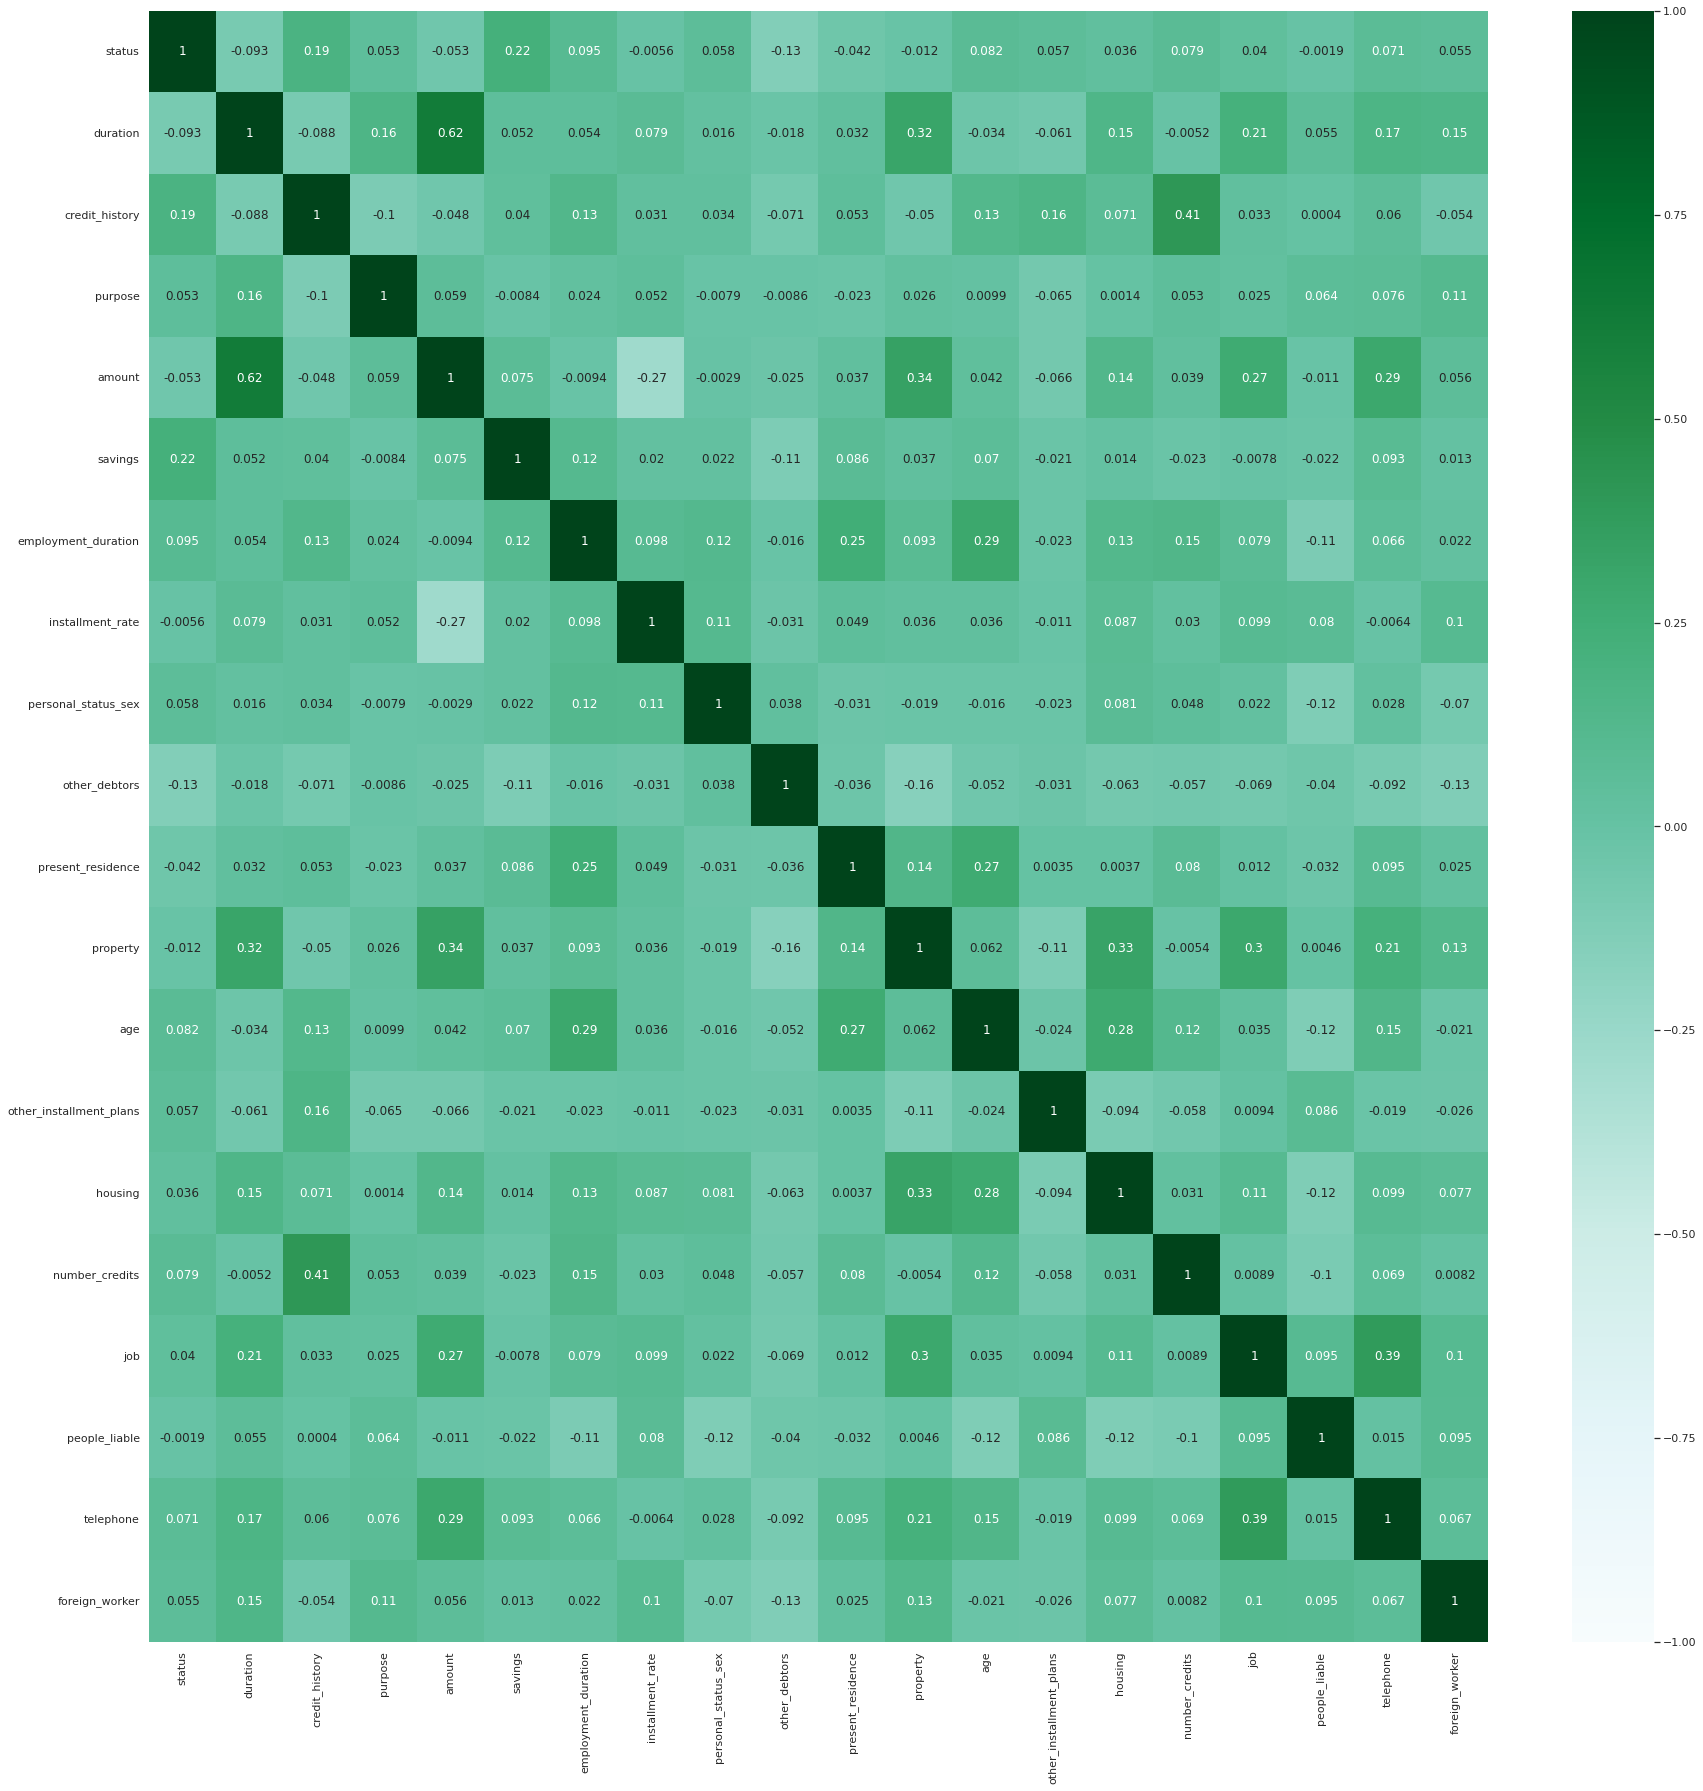

In [ ]:
sns.set(rc={'figure.figsize':(30,30)}) 
sns.heatmap(Xtv.corr(method="pearson"), vmin=-1,vmax=1,cmap='BuGn',annot=True)
plt.show()

#**Ejercicio-3.**

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas 
para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de 
cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal 
(discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha 
información realiza un Pipeline que incluya al menos las siguientes transformaciones: 

* a.  Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable 
(decide y justifica que tipo de imputación realizas en cada caso). 

* b.  Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una 
transformación que escale a todas ellas en un rango equiparable. 

* c.  Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y 
binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique  la 
transformación one-hot encoding. Por el momento dejar las variables ordinales sin 
transformar. 

In [ ]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = ['A2','A3','A7','A10','A13','A14']

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12'] # aqui hay que modificar las columnas que queremos imputar con moda 


catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])
catOHE_pipeline_nombres = [ 'A4','A5','A6','A12']


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

#**Ejercicio-4.**

Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de 
aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás 
llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda 
aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las 
siguientes características: 

*  a.  Usa los parámetros predeterminados de cada modelo.  

* b.  En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, 
recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes 
definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn. 
Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() 
de scikit-learn para definir las métricas). 

* c.  Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones. 

* d.  Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como 
para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la 
métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu 
respuesta. 

- e.  En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de 
estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado: 
-- i.  Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando 
el tamaño de la muestra para el modelo de regresión Logística con su 
hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de 
los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del 
desempeño de dicha función “learning_curve()”.  
-- ii.  Obtener las curvas de validación (validation_curve) en la cual se va incrementando 
la complejidad del hiperparámetro “max_depth” para el modelo de árbol de 
decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima 
profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del 
desempeño del modelo.  
-- iii.  Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando 
el tamaño de la muestra para el modelo de regresión bosque aleatorio (random 
forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en 
la partición de los conjuntos de entrenamiento y la métrica “recall”, como 
evaluación del desempeño del modelo.  

In [ ]:
None

#**Ejercicio-5.**

In [ ]:
None

#**Ejercicio-6.**

In [ ]:
None

###**Fin de la Actividad de la semana 6.**